In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
import math

In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn.preprocessing 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Preprocessing and data wrangling

In [5]:
data = pd.read_csv("/Users/kaylalam/Desktop/Documents/Tufts documents/SPRING 24/HIA 218/Assignment 1/R assignment 1- hcv data.csv")

In [6]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
data.shape

(615, 14)

In [8]:
print(data.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [9]:
data["Category"].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [10]:
data["Sex"].value_counts()

Sex
m    377
f    238
Name: count, dtype: int64

In [11]:
#will need to transform category and sex variables since they are text intergers into categorical intergers

In [12]:
#use label encoder to transform into categorical intergers
labelencoder = preprocessing.LabelEncoder()

In [13]:
data["cat_enc"] = labelencoder.fit_transform(list(data["Category"]))
data["sex_enc"] = labelencoder.fit_transform(list(data["Sex"]))

In [14]:
data["cat_enc"].value_counts()

cat_enc
0    533
4     30
2     24
3     21
1      7
Name: count, dtype: int64

In [15]:
#0 Blood Donor             533
#4 Cirrhosis                30
#2 Hepatitis                24
#3 Fibrosis                 21
#1 Suspect Blood Donor      7

In [16]:
data["sex_enc"].value_counts()

sex_enc
1    377
0    238
Name: count, dtype: int64

In [17]:
#1 m    377
#2 f    238

In [18]:
#Delete the first column (patient ID), since it is not a feature.
data.drop(columns=['Unnamed: 0', 'Category', 'Sex'], inplace=True)

In [19]:
#The target value (called category) have four values. Combine the categories to two categories: blood donors (including “Blood Donor” and “suspect Blood Donor”) vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis)
#0=Blood Donor             533
#4=Cirrhosis                30
#2=Hepatitis                24
#3=Fibrosis                 21
#1=Suspect Blood Donor      7

In [20]:
# map categories 
category_mapping = {
    0: 1,
    1: 1,
    2: 2,
    3: 2,
    4: 2
}

#create cat combined variable
data['cat_combined'] = data['cat_enc'].map(category_mapping)

In [21]:
data["cat_combined"].value_counts()

cat_combined
1    540
2     75
Name: count, dtype: int64

In [22]:
#0=Blood Donor             533
#4=Cirrhosis                30
#2=Hepatitis                24
#3=Fibrosis                 21
#1=Suspect Blood Donor      7

#Blood Donors (1) should be: 533+7=540; GOOD!
#Hepatitis C (2) should be: 30+24+21=75; GOOD!

In [23]:
data.drop(columns=['cat_enc'], inplace=True)

In [24]:
#Check existence of missing values
missing_values = data.isnull().sum()

In [25]:
print(missing_values)

Age              0
ALB              1
ALP             18
ALT              1
AST              0
BIL              0
CHE              0
CHOL            10
CREA             0
GGT              0
PROT             1
sex_enc          0
cat_combined     0
dtype: int64


In [26]:
#Impute the missing values with mean or median

In [27]:
ALB_mean = data['ALB'].mean()
data['ALB'].fillna(ALB_mean, inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26140/3180134590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALB'].fillna(ALB_mean, inplace=True)


In [28]:
ALP_mean = data['ALP'].mean()
data['ALP'].fillna(ALP_mean, inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26140/2175142441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALP'].fillna(ALP_mean, inplace=True)


In [29]:
ALT_mean = data['ALT'].mean()
data['ALT'].fillna(ALT_mean, inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26140/1335610130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALT'].fillna(ALT_mean, inplace=True)


In [30]:
CHOL_mean = data['CHOL'].mean()
data['CHOL'].fillna(CHOL_mean, inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26140/2240377211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CHOL'].fillna(CHOL_mean, inplace=True)


In [31]:
PROT_mean = data['PROT'].mean()
data['PROT'].fillna(PROT_mean, inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26140/3042757129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PROT'].fillna(PROT_mean, inplace=True)


In [32]:
#Identify the outliers on the data. 
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR for each column (threshold of 7)
outliers = data[(data < (Q1 - 7 * IQR)) | (data > (Q3 + 7 * IQR))]

print("Outliers:")
print(outliers)

Outliers:
     Age  ALB    ALP  ALT  AST  BIL  CHE  CHOL  CREA    GGT  PROT  sex_enc  \
0    NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
1    NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
2    NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
3    NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
4    NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
..   ...  ...    ...  ...  ...  ...  ...   ...   ...    ...   ...      ...   
610  NaN  NaN  416.6  NaN  NaN  NaN  NaN   NaN   NaN  650.9   NaN      NaN   
611  NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
612  NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
613  NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   
614  NaN  NaN    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN      NaN   

     cat_combined  
0             NaN  
1            

In [33]:
#We can see 2 outliers identified by the IQR with a threshold of 7: ALP and GGT.

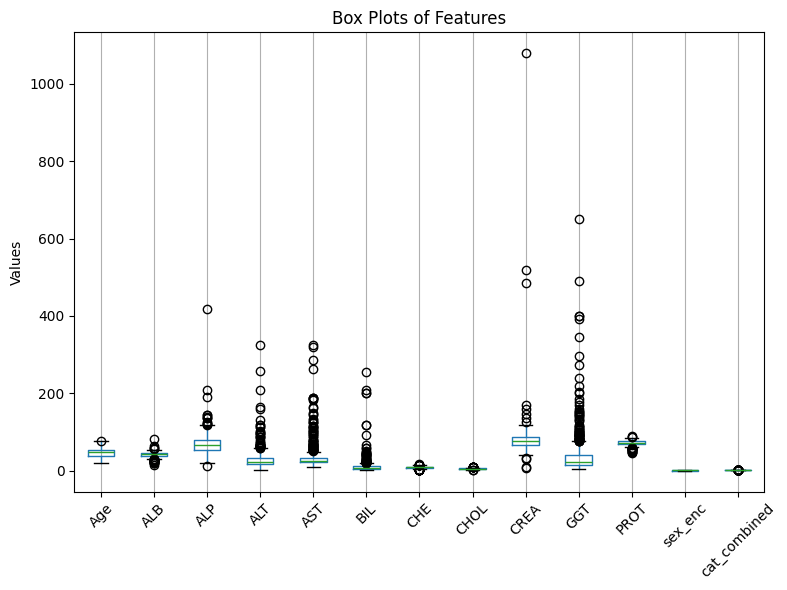

In [34]:
#1-5. Provide box-plots for each feature.
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))  
df.boxplot()
plt.title('Box Plots of Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout()  
plt.show()

In [35]:
#We can confirm here that the 2 outliers above 7 standard deviations truly do exist: ALP has one and GGT has the other. 
#Update outliers with their mean.

In [36]:
#ALP
#Calculate the mean value for outlier columns
ALP_mean = data['ALP'].mean()

# Calculate the IQR for each column
Q1 = data['ALP'].quantile(0.25)
Q3 = data['ALP'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR for each column (threshold of 7)
outliers = (data['ALP'] < (Q1 - 7 * IQR)) | (data['ALP'] > (Q3 + 7 * IQR))

data.loc[outliers, "ALP"] = ALP_mean

In [37]:
#GGT
#Calculate the mean value for outlier columns
GGT_mean = data['GGT'].mean()

# Calculate the IQR for each column
Q1 = data['GGT'].quantile(0.25)
Q3 = data['GGT'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR for each column (threshold of 7)
outliers = (data['GGT'] < (Q1 - 7 * IQR)) | (data['GGT'] > (Q3 + 7 * IQR))

data.loc[outliers, "GGT"] = GGT_mean

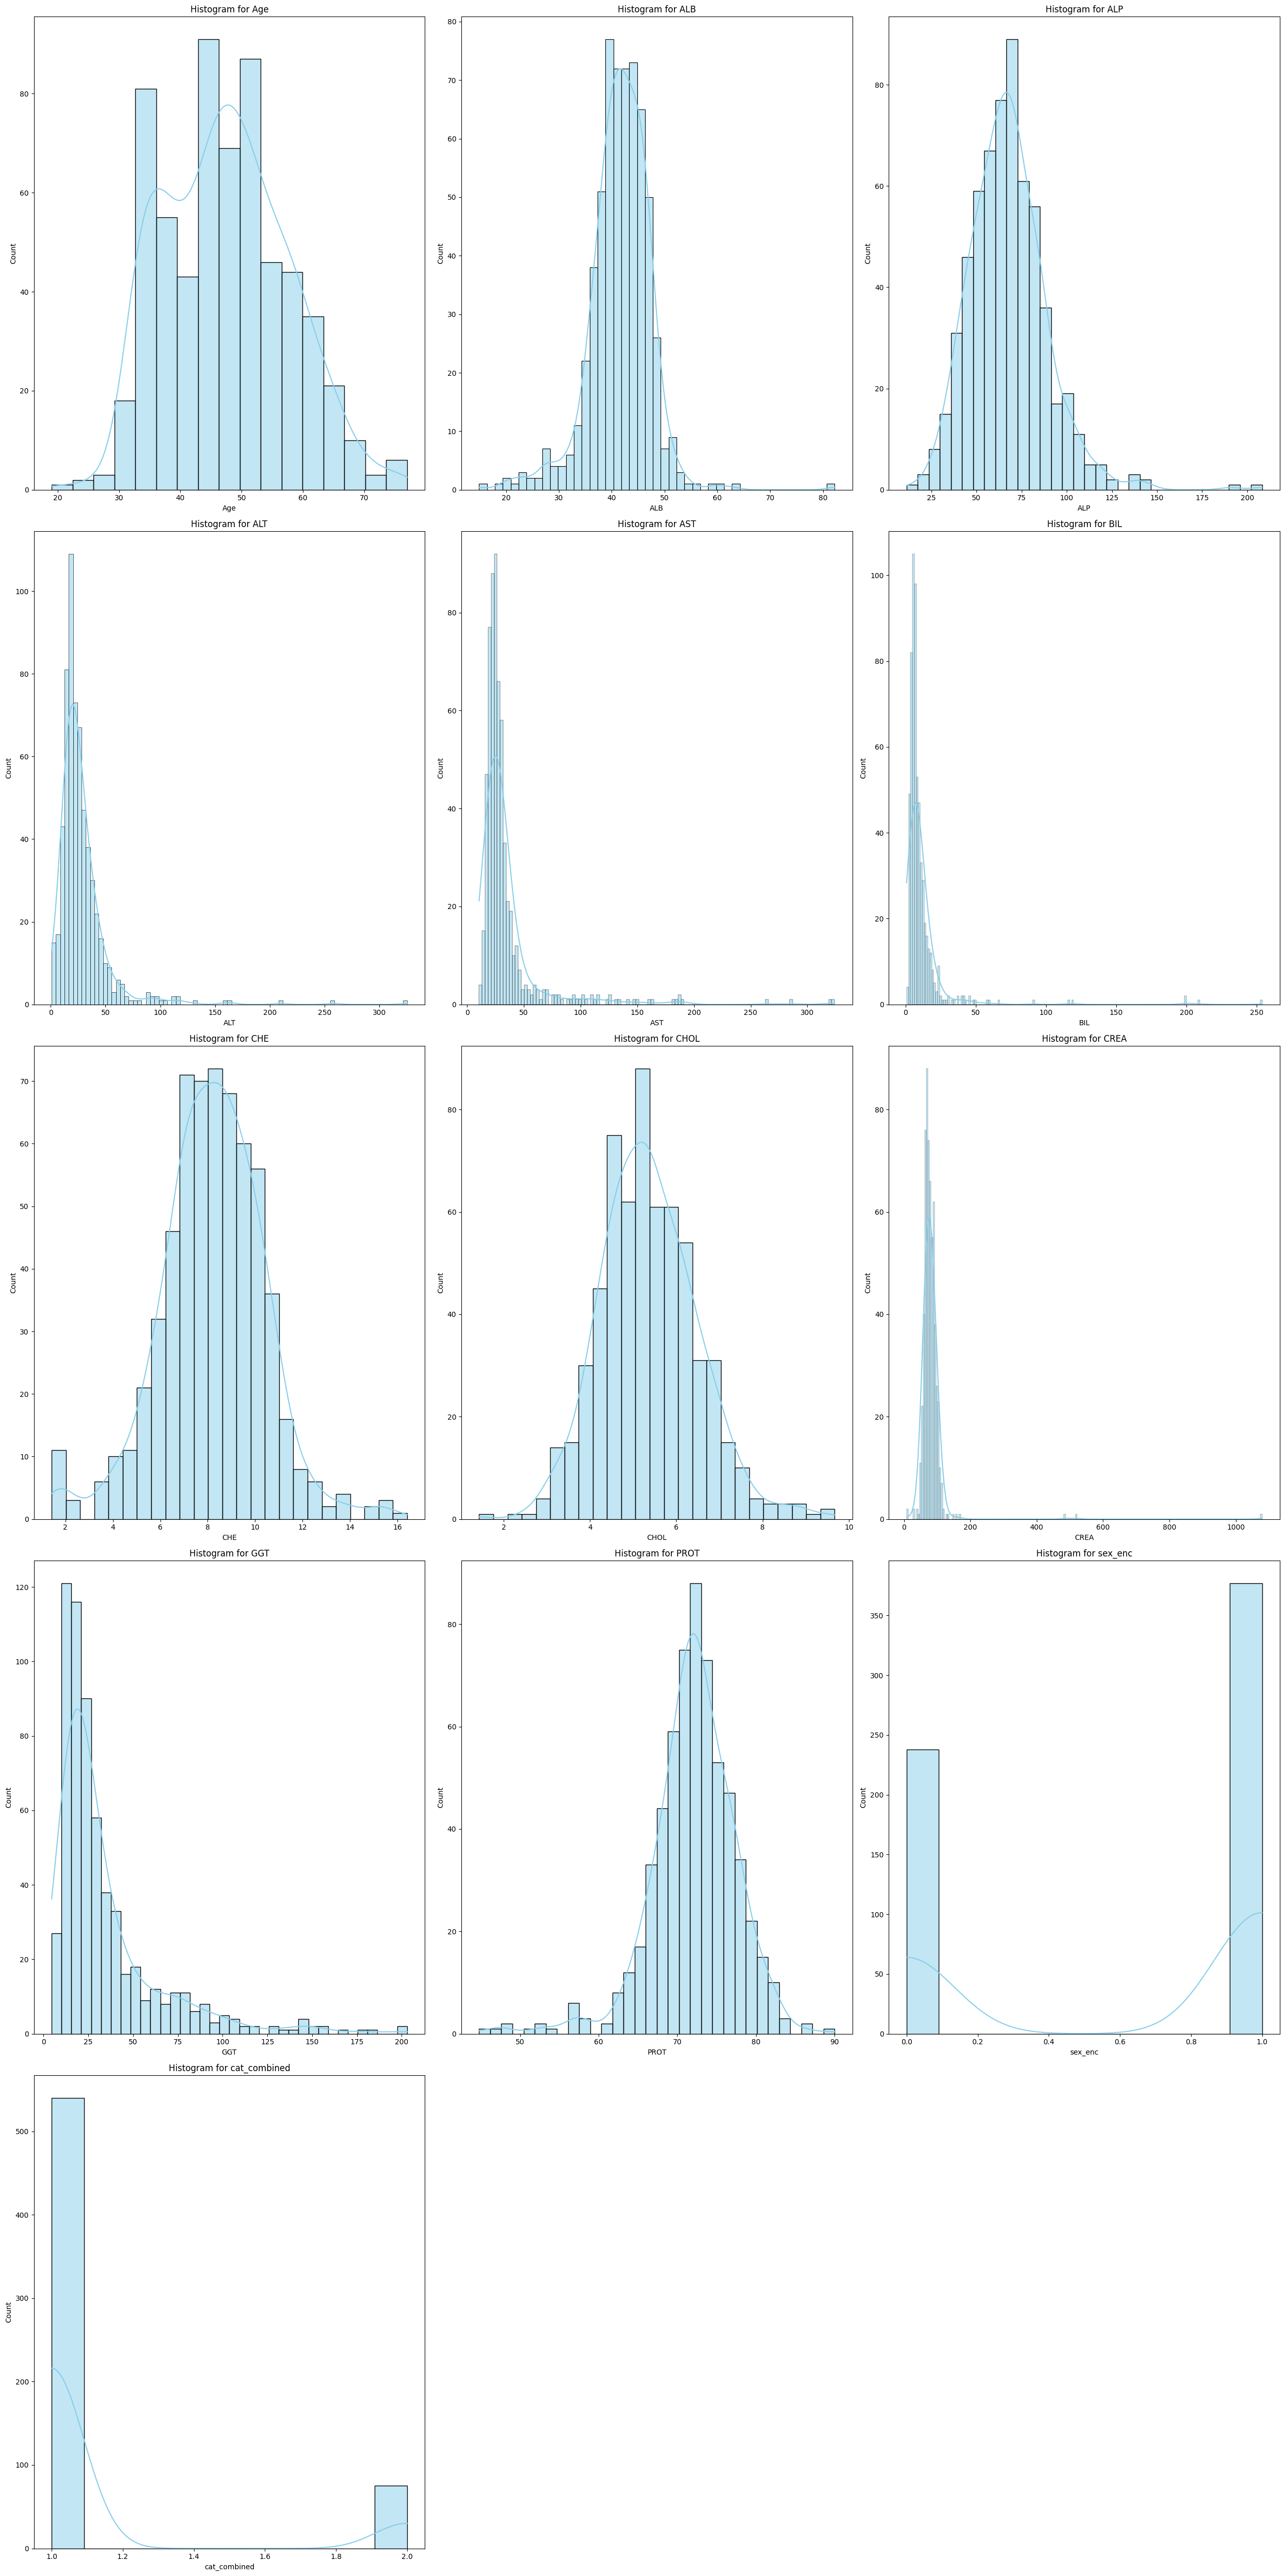

In [38]:
#Standardization - KNN is sensitive to data standardization.
#View distribution of current data
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

num_rows = math.ceil(len(numeric_columns)/3)
plt.figure(figsize=(25,10 * num_rows))

for i, numeric_columns in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=data[numeric_columns], kde=True, color='skyblue')
    plt.title(f"Histogram for {numeric_columns}")
    
plt.tight_layout()
plt.show()

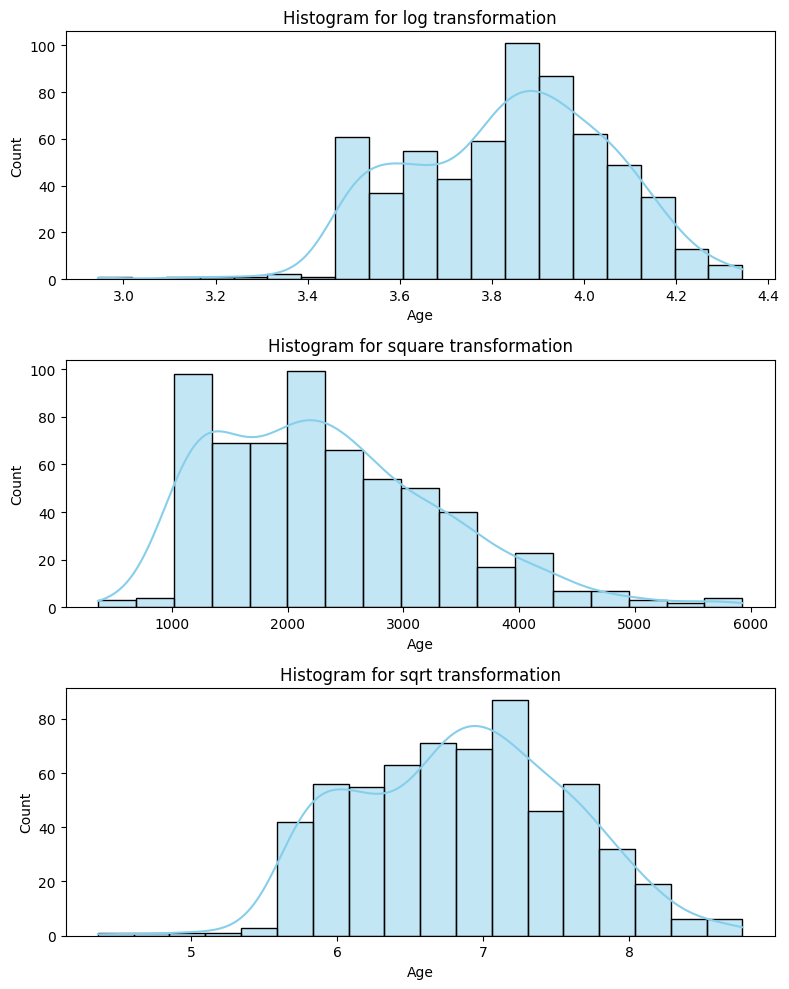

In [39]:
# List of transformations - age
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["Age"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [40]:
#Square transformation looks best, so lets do that to Age and then standardize

# Square-transformed variable
square_transformed_age = np.square(data['Age'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(square_transformed_age).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_age'] = scaler.fit_transform(data_reshaped)

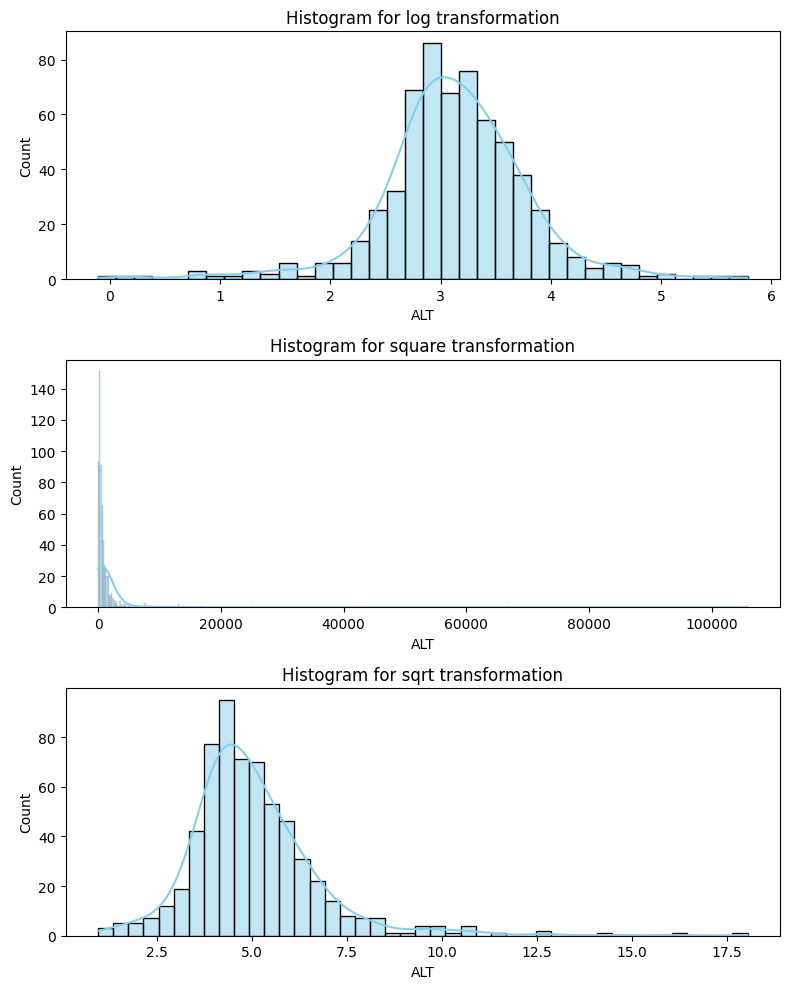

In [41]:
# List of transformations - ALT
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["ALT"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [42]:
#Log transformation looks best, so lets do that to ALT and then standardize

# Square-transformed variable
log_transformed_ALT = np.log(data['ALT'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(log_transformed_ALT).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_alt'] = scaler.fit_transform(data_reshaped)


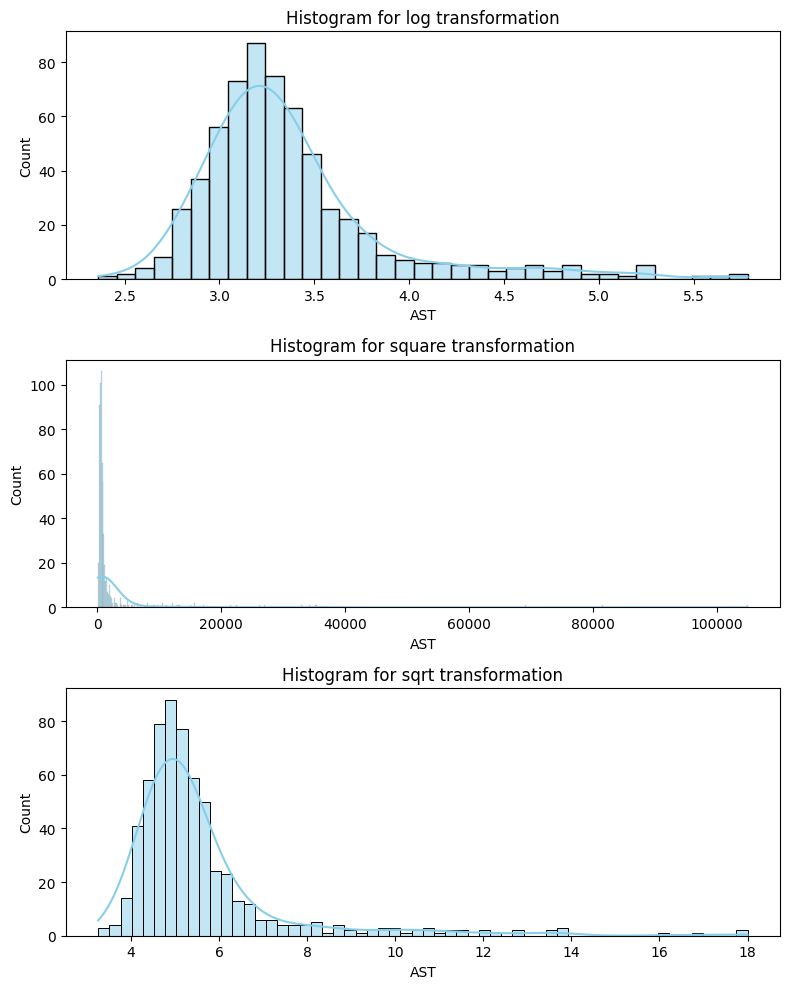

In [43]:
# List of transformations - AST
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["AST"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [44]:
#Log transformation looks best, so lets do that to AST and then standardize

# Square-transformed variable
log_transformed_AST = np.log(data['AST'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(log_transformed_AST).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_ast'] = scaler.fit_transform(data_reshaped)

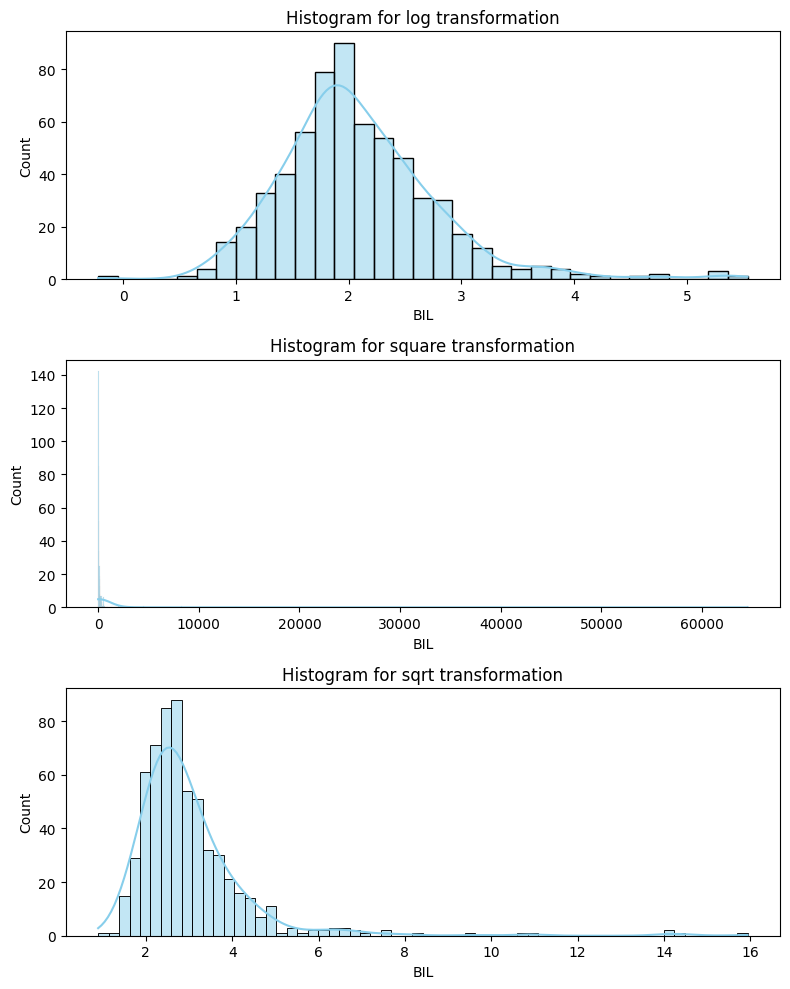

In [45]:
# List of transformations - BIL
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["BIL"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [46]:
#Log transformation looks best, so lets do that to BIL and then standardize

# Square-transformed variable
log_transformed_BIL = np.log(data['BIL'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(log_transformed_BIL).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_bil'] = scaler.fit_transform(data_reshaped)

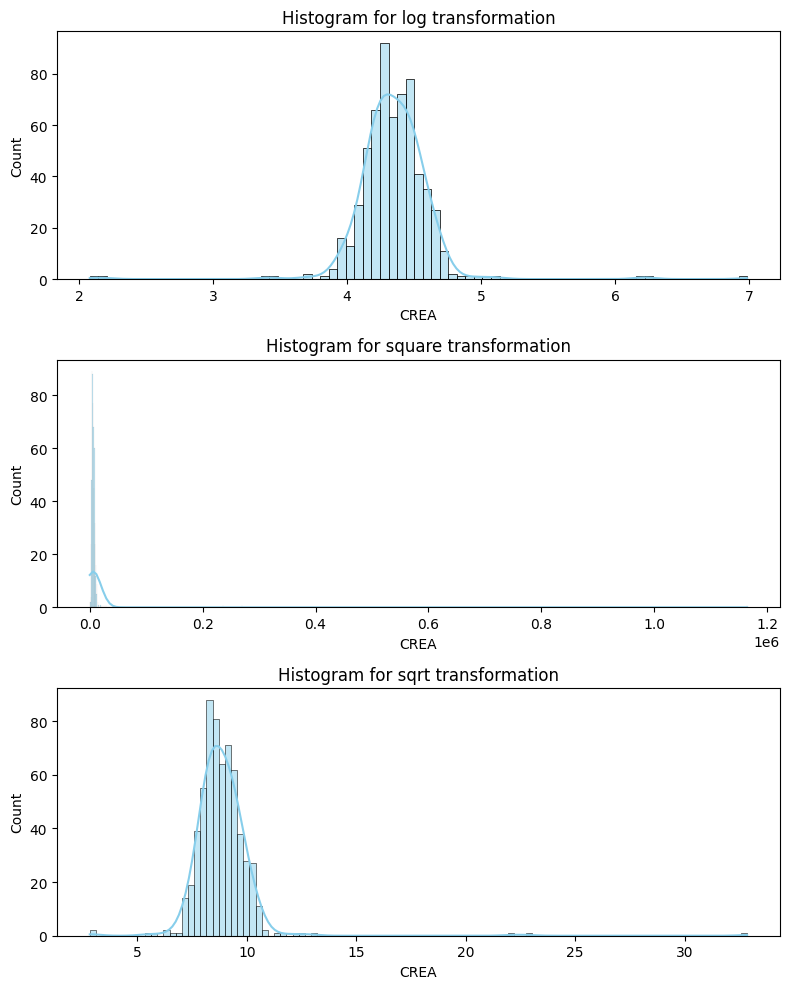

In [47]:
# List of transformations - CREA
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["CREA"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [48]:
#Log transformation looks best, so lets do that to CREA and then standardize

# Square-transformed variable
log_transformed_CREA = np.log(data['CREA'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(log_transformed_CREA).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_crea'] = scaler.fit_transform(data_reshaped)

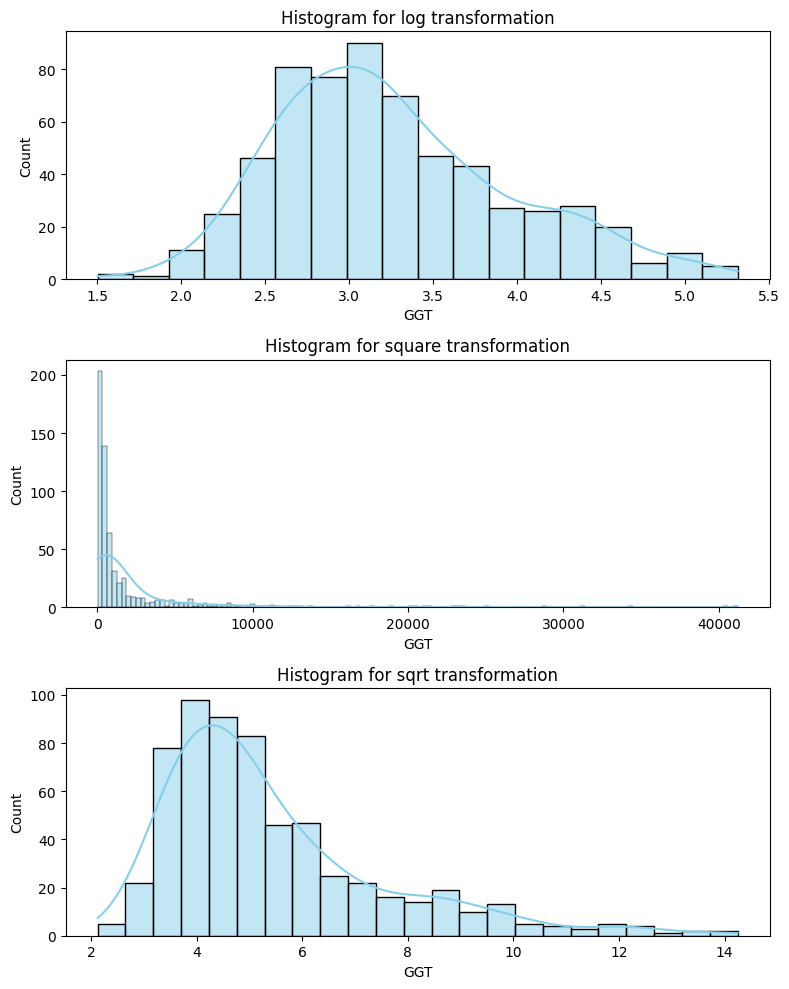

In [49]:
# List of transformations - GGT
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data["GGT"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [50]:
#Log transformation looks best, so lets do that to GGT and then standardize

# Square-transformed variable
log_transformed_GGT = np.log(data['GGT'])

#standardized scaling
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(log_transformed_GGT).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_squared_ggt'] = scaler.fit_transform(data_reshaped)

In [51]:
data.drop(columns=['Age', 'ALT', 'AST', 'BIL', 'CREA', 'GGT'], inplace=True)

In [52]:
#standardized scaling for other variables
from sklearn.preprocessing import StandardScaler

data_reshaped = np.array(data['ALB']).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_ALB'] = scaler.fit_transform(data_reshaped)

data_reshaped = np.array(data['ALP']).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_ALP'] = scaler.fit_transform(data_reshaped)

data_reshaped = np.array(data['CHE']).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_CHE'] = scaler.fit_transform(data_reshaped)

data_reshaped = np.array(data['CHOL']).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_CHOL'] = scaler.fit_transform(data_reshaped)

data_reshaped = np.array(data['PROT']).reshape(-1, 1)
scaler = StandardScaler()
data['standardized_PROT'] = scaler.fit_transform(data_reshaped)

In [53]:
data.drop(columns=['ALB', 'ALP', 'CHE', 'CHOL', 'PROT'], inplace=True)

In [54]:
#Splitting the dataset
#Calculate the number of samples needed for each group a dataset with 70% health and 30% sick
#75 hep c, 175 healthy (250 total)

#Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#Create a DataFrame for the balanced dataset
new_data = pd.DataFrame(columns=['cat_combined'])

#Add samples for healthy patients
new_data_healthy = data[data['cat_combined'] == 1].head(175)

#Add samples for Hepatitis C patients
new_data_hepc = data[data['cat_combined'] == 2].head(75)

new_data = pd.concat([new_data_healthy, new_data_hepc])

#Shuffle the balanced dataset
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset:")
print(new_data)

Balanced Dataset:
     sex_enc  cat_combined  standardized_squared_age  \
0          0             1                  0.574732   
1          1             1                  1.146902   
2          1             1                 -1.275457   
3          1             1                 -0.837974   
4          1             1                 -0.045036   
..       ...           ...                       ...   
245        1             1                 -1.207606   
246        1             1                  0.255734   
247        1             1                 -0.991903   
248        1             2                 -1.640026   
249        0             1                  1.028418   

     standardized_squared_alt  standardized_squared_ast  \
0                   -0.208312                 -0.514227   
1                   -0.548571                 -0.128738   
2                   -1.206912                 -0.739236   
3                    1.313757                  0.150022   
4             

In [55]:
new_data.head()

,sex_enc,cat_combined,standardized_squared_age,standardized_squared_alt,standardized_squared_ast,standardized_squared_bil,standardized_squared_crea,standardized_squared_ggt,standardized_ALB,standardized_ALP,standardized_CHE,standardized_CHOL,standardized_PROT
0,0,1,0.574732,-0.208312,-0.514227,-0.192415,-0.505954,-0.558352,0.291066,0.409953,-0.071073,1.248851,0.232833
1,1,1,1.146902,-0.548571,-0.128738,-1.410222,0.586672,-0.896549,-0.557975,-0.304231,-0.597421,1.355750,-1.398657
2,1,1,-1.275457,-1.206912,-0.739236,-0.487696,0.082013,-0.479092,0.828214,0.022520,-0.379622,-0.951491,-0.638531
3,1,1,-0.837974,1.313757,0.150022,0.334529,0.171236,0.272943,-0.488665,-0.710335,1.126824,0.794529,0.955879
4,1,1,-0.045036,0.378295,-0.099753,0.719263,0.851144,0.148707,0.828214,-0.168863,0.850037,2.593999,2.086798


In [56]:
new_data.shape
#75 hep c, 175 healthy (250 total), looks good!

(250, 13)

In [57]:
#Balanced data split
#Calculate the number of samples needed for each group in the balanced dataset
#75 hep c, 113 healthy (188 total)

#Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#Create a DataFrame for the balanced dataset
balanced_data = pd.DataFrame(columns=['cat_combined'])

#Add samples for healthy patients
balanced_data_healthy = data[data['cat_combined'] == 1].head(113)

#Add samples for Hepatitis C patients
balanced_data_hepc = data[data['cat_combined'] == 2].head(75)

balanced_data = pd.concat([balanced_data_healthy, balanced_data_hepc])

#Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset:")
print(balanced_data)

Balanced Dataset:
     sex_enc  cat_combined  standardized_squared_age  \
0          0             2                  1.389949   
1          1             2                  1.146902   
2          0             1                 -1.275457   
3          0             1                 -0.505811   
4          1             1                  0.255734   
..       ...           ...                       ...   
183        1             1                 -1.065829   
184        1             1                 -0.045036   
185        1             1                 -0.591890   
186        1             2                 -0.045036   
187        1             1                  0.685115   

     standardized_squared_alt  standardized_squared_ast  \
0                    0.276636                  2.723340   
1                   -2.186055                  2.362737   
2                   -0.420615                 -0.623545   
3                   -1.728928                 -1.004357   
4             

In [58]:
balanced_data.head()

,sex_enc,cat_combined,standardized_squared_age,standardized_squared_alt,standardized_squared_ast,standardized_squared_bil,standardized_squared_crea,standardized_squared_ggt,standardized_ALB,standardized_ALP,standardized_CHE,standardized_CHOL,standardized_PROT
0,0,2,1.389949,0.276636,2.723340,1.453464,-0.788498,2.702456,1.451998,-1.555219,0.582326,-0.666427,2.587369
1,1,2,1.146902,-2.186055,2.362737,3.855353,-0.870140,1.039540,-1.840199,0.867404,-3.006826,-1.655245,-0.657071
2,0,1,-1.275457,-0.420615,-0.623545,-0.172028,-0.453083,0.300154,-0.592629,-0.621646,0.214789,0.286758,-0.953705
3,0,1,-0.505811,-1.728928,-1.004357,-0.321213,-0.199875,-0.836030,-0.454010,-0.220209,-0.538434,-0.381362,0.436769
4,1,1,0.255734,0.276636,-0.385534,0.069633,0.384996,0.437198,0.966832,0.484639,0.881800,1.043961,-0.082341


In [59]:
balanced_data.shape
#75 hep c, 113 healthy (188 total), looks good!

(188, 13)

In [60]:
#From the new 60:40 balanced dataset, use 70% for training the ML model and 30% for testing the ML.

In [61]:
outcome = "cat_combined"
var_list = ["standardized_ALB", "standardized_ALP", "standardized_CHE", "standardized_CHOL", "standardized_PROT", "sex_enc", "standardized_squared_age", "standardized_squared_alt", "standardized_squared_ast", "standardized_squared_bil", "standardized_squared_crea", "standardized_squared_ggt"]

In [62]:
X = np.array(balanced_data[var_list])

In [63]:
y = np.array(balanced_data[outcome])

In [64]:
import sklearn

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.3)

In [66]:
#KNN - test set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

k_values = [5, 10, 15, 20, 25]
train_accuracies = []
test_accuracies = []

for k in k_values:
    #Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    #Predict on train and test sets
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    
    #Calculate accuracy on train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    #Print confusion matrix for the test set
    print(f"Confusion Matrix for k={k}:\n{confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix for k=5:
[[31  0]
 [ 6 20]]
Confusion Matrix for k=10:
[[31  0]
 [ 8 18]]
Confusion Matrix for k=15:
[[31  0]
 [ 8 18]]
Confusion Matrix for k=20:
[[31  0]
 [10 16]]
Confusion Matrix for k=25:
[[31  0]
 [10 16]]


In [67]:
#For test set:
#Confusion Matrix for k=5:
#True Negatives (TN): 34
#False Positives (FP): 0
#False Negatives (FN): 2
#True Positives (TP): 21
#Good at predicting true negatives and positives, very little misclassification errors.

#Confusion Matrix for k=10:
#TN: 34
#FP: 0
#FN: 6
#TP: 17
#Worse at predicting true positives and false negatives!

#Confusion Matrix for k=15:
#TN: 34
#FP: 0
#FN: 5
#TP: 18
#Better at predicting true negatives and positives and improved false negative screening.

#Confusion Matrix for k=20:
#TN: 34
#FP: 0
#FN: 8
#TP: 15
#No false positives! But worse at predicting true positives and higher amount of false negatives.

#Confusion Matrix for k=25:
#TN: 34
#FP: 0
#FN: 8
#TP: 15
#Similar to K=20!

In [68]:
#knn - train set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

k_values = [5, 10, 15, 20, 25]
train_accuracies = []
test_accuracies = []

for k in k_values:
    #Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    #Predict on train and test sets
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    
    #Calculate accuracy on train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    #Print confusion matrix for the train set
    print(f"Confusion Matrix for k={k}:\n{confusion_matrix(y_train, y_train_pred)}")

Confusion Matrix for k=5:
[[82  0]
 [ 8 41]]
Confusion Matrix for k=10:
[[82  0]
 [15 34]]
Confusion Matrix for k=15:
[[82  0]
 [16 33]]
Confusion Matrix for k=20:
[[82  0]
 [18 31]]
Confusion Matrix for k=25:
[[82  0]
 [19 30]]


In [69]:
#For train set:
#Confusion Matrix for k=5:
#True Negatives (TN): 79
#False Positives (FP): 0
#False Negatives (FN): 8
#True Positives (TP): 44
#very high true neg/positive, low amount of false neg.

#Confusion Matrix for k=10:
#TN: 79
#FP: 0
#FN: 14
#TP: 38
#same number of true negs, less true positives, higher false negatives.

#Confusion Matrix for k=15:
#TN: 79
#FP: 0
#FN: 13
#TP: 39
#Same true neg, higher true pos, lower false neg!

#Confusion Matrix for k=20:
#TN: 79
#FP: 0
#FN: 18
#TP: 34
#same true neg, less tru pos, higher false neg

#Confusion Matrix for k=25:
#TN: 79
#FP: 0
#FN: 18
#TP: 34
#same as k=20!

#k=5  seems to be the sweet spot for both the test and training sets
#least amount of false positive and negatives
#highest amount of true negatives and positives